# Jupyter Notebook

Это интерактивная оболочка для языка программирования Python. Она позволяет запускать ноутбуки (файлы с расширением .ipynb) в браузере, выполнять код поэтапно ячейку за ячейкой, сохраняя между этапами значения всех переменных и дает возможности для визуального оформления результатов

In [1]:
a = 5 + 2

In [2]:
a

7

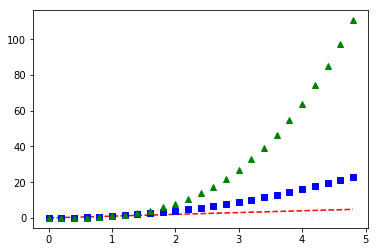

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
t = np.arange(0., 5., 0.2)
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

# Списки

Списки в Python - упорядоченные изменяемые коллекции объектов произвольных типов. Справочник сложностей разных операций для различных типов данных: https://wiki.python.org/moin/TimeComplexity

In [12]:
l = [7, 3, 4, 6, 7, 9]

print(len(l))   # длина списка (сложность O(1))

if 8 not in l:  # проверка принадлежности списку (сложность O(n))
    l.append(8) # добавление в конец списка (сложность O(1))
    
l.insert(2, -1) # а еще можно добавить на определенную позицию (сложность O(n))
l.extend([11, 12, 13]) # или добавить в конец целую последовательность

print(l[1])     # получение элемента по индексу (сложность O(1))
print(l[-2])    # получение второго с конца элемента списка
print(l)

print(min(l))   # нахождение минимального элемента (сложность O(n))

6
3
12
[7, 3, -1, 4, 6, 7, 9, 8, 11, 12, 13]
-1


Для получения срезов последовательности в Пайтоне принято указывать не номера элементов, а номера «промежутков» между ними. Перед первым элементом последовательности промежуток имеет индекс 0, перед вторым – 1 и так далее. Отрицательные значения отсчитывают элементы с конца строки.
В общем виде срез записывается в следующем виде:
список[начало: конец: шаг]
По умолчанию начало среза равно 0, конец среза равен len(список), шаг равен 1. Если шаг не указывается, второй символ «:» можно опустить.

https://habrahabr.ru/post/30092/

In [7]:
# Получение среза или диапазона элементов из списка

print(l[1:3])  # элементы с индексами 1 и 3
print(l[-2:])  # последние два элемента
print(l[::2])  # только элементы с четными индексами

[3, -1]
[12, 13]
[7, -1, 6, 9, 11, 13]


Список можно использовать в качестве стека.

Стек — абстрактный тип данных, представляющий собой список элементов, организованных по принципу LIFO (англ. last in — first out, «последним пришёл — первым вышел»). Чаще всего принцип работы стека сравнивают со стопкой тарелок: чтобы взять вторую сверху, нужно снять верхнюю.

Программный вид стека используется для обхода структур данных, например, дерево или граф. При использовании рекурсивных функций также будет применяться стек.

In [6]:
stack = ['f', 'l', 'k']
stack.append('o') # добавляет элемент "наверх" стека (стопки)
print(stack.pop()) # возвращает верхний элемент и удаляет его из стека
print(stack.pop())
print(stack.pop())

print(stack)

o
k
l
['f']


# Итераторы

Итератор — это объект, который позволяет брать из источника элемент за элементом, при этом итератор знает только о том объекте, на котором он в текущий момент остановился.

У итератора в обязательном порядке должна быть функция next() (и кроме того функция __iter__)

In [8]:
a = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

for i in a:
    print(i)

0
1
2
3
4
5
6
7
8
9


In [9]:
# Теперь то же самое только с помощью итератора

class simple_iterator:
    def __init__(self, n):
        self.i = 0
        self.n = n
    def __iter__(self):
        return self
    def __next__(self):
        if self.i < self.n:
            i = self.i
            self.i += 1
            return i
        else:
            raise StopIteration()
            
for i in simple_iterator(10):
    print(i)

0
1
2
3
4
5
6
7
8
9


# Генераторы

А теперь чуть сложнее...

iterator is a more general concept: any object whose class has a next method (\__next\__ in Python 3) and an \__iter\__ method that does return self. Every generator is an iterator, but not vice versa. A generator is built by calling a function that has one or more yield expressions. (ответ с сайта stackoverflow)

Теперь на примере.

In [11]:
def squares(start, stop):
    for i in range(start, stop):
        yield i * i
        
for s in squares(1, 4):
    print(s)

1
4
9


Чтобы освоить yield, вы должны понимать, что когда вы вызываете функцию, код внутри тела функции не исполняется. Функция только возвращает объект-генератор.

Ваш код будет вызываться каждый раз, когда for обращается к генератору.

В первый запуск вашей функции, она будет исполняться от начала до того момента, когда она наткнётся на yield — тогда она вернёт первое значение из цикла. На каждый следующий вызов будет происходить ещё одна итерация написанного вами цикла, возвращаться будет следующее значение — и так пока значения не кончатся.

Подробнее: https://habrahabr.ru/post/132554/ (**очень рекомендую прочитать!**)

# Сортировка

**Сортировка выбором**

Шаги алгоритма:
* находим номер минимального значения в текущем списке
* производим обмен этого значения со значением первой неотсортированной позиции (обмен не нужен, если минимальный элемент уже находится на данной позиции)
* теперь сортируем хвост списка, исключив из рассмотрения уже отсортированные элементы

Сложность O(n^2)

In [19]:
def selection_sort(source):
    for i in range(len(source)):
        mini = min(source[i:]) #find minimum element
        min_index = source[i:].index(mini) #find index of minimum element
        source[i + min_index] = source[i] #replace element at min_index with first element
        source[i] = mini                  #replace first element with min element
    return source

In [20]:
print(selection_sort([54,26,93,17,77,31,44,55,20]))

[17, 20, 26, 31, 44, 54, 55, 77, 93]


# Быстрая сортировка

Алгоритм состоит из трёх шагов:

* Выбрать элемент из массива. Назовём его опорным.
* Разбиение: перераспределение элементов в массиве таким образом, что элементы меньше опорного помещаются перед ним, а больше или равные после.
* Рекурсивно применить первые два шага к двум подмассивам слева и справа от опорного элемента. Рекурсия не применяется к массиву, в котором только один или отсутствуют элементы.

Почему сложность O(n * log n)? (логарифмы тут подразумеваются двоичные)

В наиболее сбалансированном варианте при каждой операции разделения массив делится на две почти одинаковые части, следовательно, максимальная глубина рекурсии, при которой размеры обрабатываемых подмассивов достигнут 1, составит log n. Для каждого разбиения мы сравниваем опорный элемент с остальными элементами подмассива, что дает множетель n в оценке сложности

![Лучший случай](img/quick1.png)

**Более формальное описание процедуры разделения:**

* Введем два указателя: i и j. В начале алгоритма они указывают, соответственно, на левый и правый конец последовательности.
* Будем двигать указатель i с шагом в 1 элемент по направлению к концу массива, пока не будет найден элемент a[i] >= p. * Затем аналогичным образом начнем двигать указатель j от конца массива к началу, пока не будет найден a[j] <= p.
* Далее, если i <= j, меняем a[i] и a[j] местами и продолжаем двигать i,j по тем же правилам...
* Повторяем шаг 3, пока i <= j.


In [21]:
def partition(myList, start, end):
    pivot = myList[start]  # опорным выбирается первый элемент
    left = start+1
    right = end
    done = False
    while not done:
        while left <= right and myList[left] <= pivot:
            left = left + 1
        while myList[right] >= pivot and right >=left:
            right = right -1
        if right < left:
            done= True
        else:
            # меняем местами
            temp=myList[left]
            myList[left]=myList[right]
            myList[right]=temp
    # меняем опорный местами с myList[right] (чтобы он стоял не на первой позиции а делил пополам)
    temp=myList[start]
    myList[start]=myList[right]
    myList[right]=temp
    return right


def quicksort(myList, start, end):
    if start < end:
        pivot = partition(myList, start, end)
        # рекурсивная сортировка двух частей
        quicksort(myList, start, pivot-1)
        quicksort(myList, pivot+1, end)
    return myList

In [25]:
# Тестирование
list_for_sort = [54,26,93,17,77,31,44,55,20]
sorted_list = quicksort(list_for_sort, 0, len(list_for_sort)-1)
print(sorted_list)

[17, 20, 26, 31, 44, 54, 55, 77, 93]


**Все круто? Нет**
* Неустойчивость
* Проблема выбора опорного элемента

**Вариации**
* Выбор опорного элемнта
* Количество опорных эелементов
Тут разбор случая с двумя опорами: http://codeblab.com/wp-content/uploads/2009/09/DualPivotQuicksort.pdf (с оценкой эффективности в сравнении с классическим вариантом)

# Двоичный поиск


* Определение значения элемента в середине структуры данных. Полученное значение сравнивается с ключом.
* Если ключ меньше значения середины то поиск осуществляется в первой половине элементов, иначе — во второй.
* Поиск сводится к тому, что вновь определяется значение серединного элемента в выбранной половине и сравнивается с ключом.
* Процесс продолжается до тех пор, пока не будет найден элемент со значением ключа или не станет пустым интервал для поиска.

In [24]:
def binary_search(lst, x):
    l = 0
    r = len(lst)
    while r - l > 1:
        m = (l + r) // 2
        if x < lst[m]:
            r = m
        else:
            l = m
    return l if lst[l] == x else None 

In [26]:
print(binary_search(sorted_list, 26))

2
